# IBM Final Project: Advanced SQL Techniques

This project utilized MySQL with the phpMyAdmin GUI. Answers to the problems were presented in image format (unfortunately, SQLite does not support stored procedures or transactions). Towards the end of the notebook, the Pandas library was employed to access the databases used in this project, enabling the display of the first 10 rows of their contents

For completion of the assignment problems in this notebook the three datasets that are available on the city of Chicago's Data Portal were used:

1. Socioeconomic Indicators in Chicago
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

2. Chicago Public Schools
This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

3. Chicago Crime Data
This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

## Exercise 1: Using Joins

Question 1:
Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.

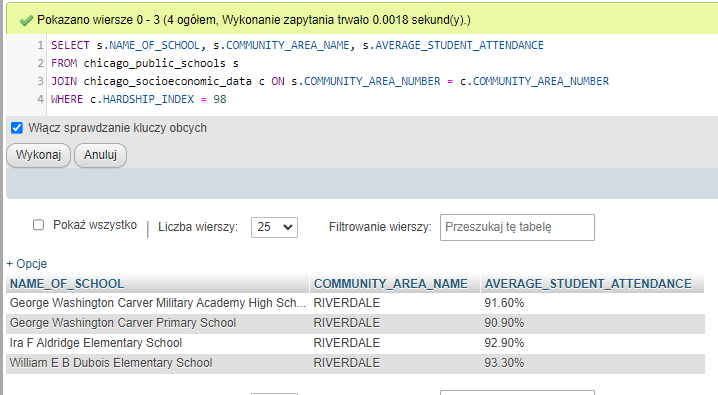

Question 2:
Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.

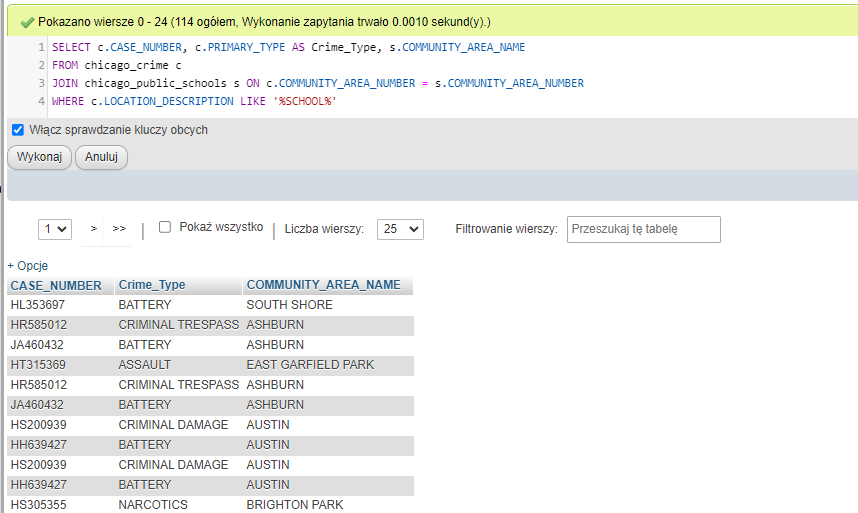

## Exercise 2: Creating a View

Question 1:
Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column.
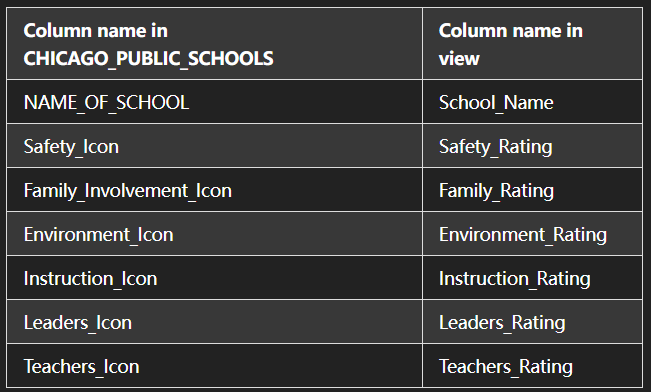

Answer: 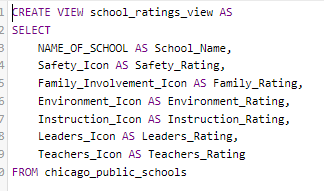 

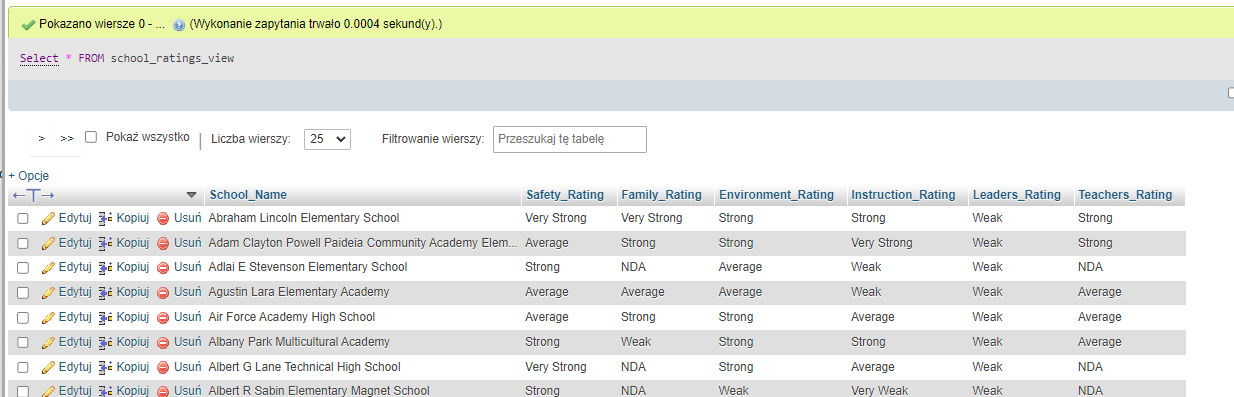

Question 2: Write and execute a SQL statement that returns just the school name and leaders rating from the view.

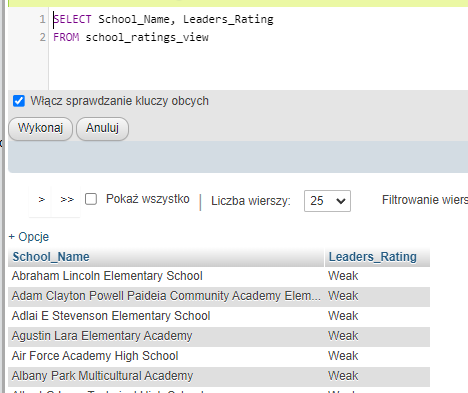

## Exercise 3: Creating a Stored Procedure

Question 1:
Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer.

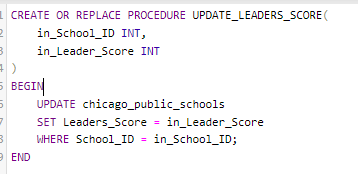

Question 2:
Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID using the following information.

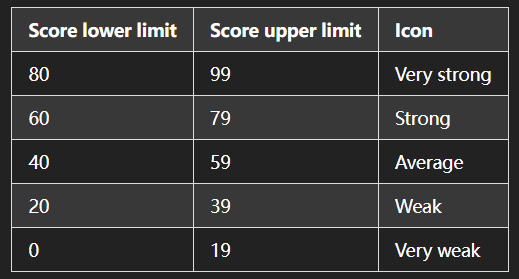

Answer: 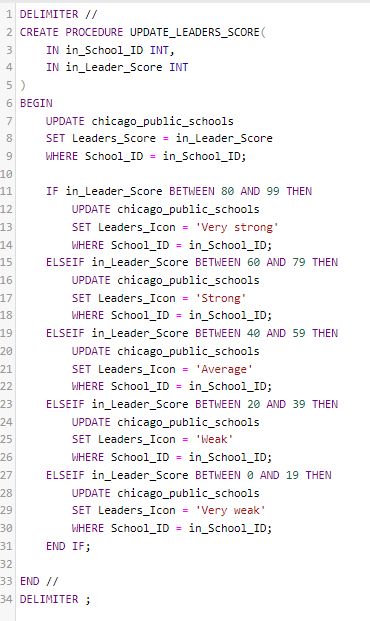

# Exercise 4: Using Transactions

You realise that if someone calls your code with a score outside of the allowed range (0-99), then the score will be updated with the invalid data and the icon will remain at its previous value. There are various ways to avoid this problem, one of which is using a transaction. 

Question:
Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories.

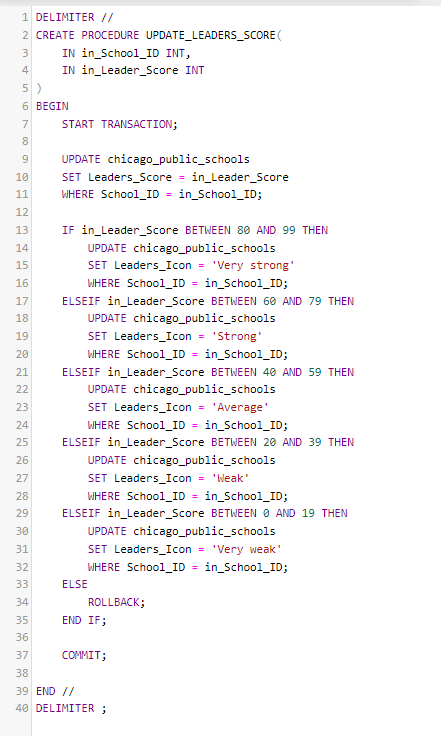

## Showcase of the datasets

In [1]:
import pandas as pd

chicago_census_data = pd.read_csv('ChicagoCensusData.csv')
chicago_crime_data = pd.read_csv('ChicagoCrimeData.csv')
chicago_public_schools = pd.read_csv('ChicagoPublicSchools.csv')

In [2]:
chicago_census_data.head(10)

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [3]:
chicago_crime_data.head(10)

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"
5,7732712,HS540106,2010-09-29,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,12,27.0,24.0,6,1171668.0,1905607.0,2010,41.896447,-87.644939,"(41.896446772, -87.644938678)"
6,10769475,HZ534771,2016-11-30,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,False,False,...,17,33.0,14.0,6,1154133.0,1933314.0,2016,41.972845,-87.708600,"(41.972844913, -87.708600079)"
7,4494340,HL793243,2005-12-16,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,2,3.0,38.0,6,1180448.0,1879234.0,2005,41.823880,-87.613504,"(41.823879885, -87.613503857)"
8,3778925,HL149610,2005-01-28,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,False,False,...,22,19.0,72.0,6,1160129.0,1838040.0,2005,41.711281,-87.689179,"(41.711280513, -87.689179097)"
9,3324217,HK361551,2004-05-13,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False,...,17,35.0,21.0,6,1153590.0,1921084.0,2004,41.939296,-87.710923,"(41.939295821, -87.710923442)"


In [4]:
chicago_public_schools.head(10) 

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"
5,610212,Albany Park Multicultural Academy,MS,4929 N Sawyer Ave,Chicago,IL,60625,(773) 534-5108,http://schoolreports.cps.edu/SchoolProgressRep...,O'Hare Elementary Network,...,NDA,1153858.196,1932691.891,41.971143,-87.709627,14,ALBANY PARK,39,17,"(41.9711433, -87.70962725)"
6,609720,Albert G Lane Technical High School,HS,2501 W Addison St,Chicago,IL,60618,(773) 534-5400,http://schoolreports.cps.edu/SchoolProgressRep...,North-Northwest Side High School Network,...,90.7,1158975.392,1923791.705,41.946617,-87.691056,5,NORTH CENTER,47,19,"(41.94661693, -87.69105603)"
7,610342,Albert R Sabin Elementary Magnet School,ES,2216 W Hirsch St,Chicago,IL,60622,(773) 534-4491,http://schoolreports.cps.edu/SchoolProgressRep...,Fulton Elementary Network,...,NDA,1161265.299,1909314.592,41.906843,-87.683043,24,WEST TOWN,1,14,"(41.90684338, -87.68304259)"
8,610524,Alcott High School for the Humanities,HS,2957 N Hoyne Ave,Chicago,IL,60618,(773) 534-5979,http://schoolreports.cps.edu/SchoolProgressRep...,North-Northwest Side High School Network,...,87.6,1161870.556,1919857.440,41.935761,-87.680524,5,NORTH CENTER,1,19,"(41.93576106, -87.68052441)"
9,610209,Alessandro Volta Elementary School,ES,4950 N Avers Ave,Chicago,IL,60625,(773) 534-5080,http://schoolreports.cps.edu/SchoolProgressRep...,O'Hare Elementary Network,...,NDA,1149774.095,1932831.151,41.971606,-87.724641,14,ALBANY PARK,39,17,"(41.97160605, -87.72464139)"
